In [6]:
#importing necessary modules
import numpy as np
from matplotlib import pyplot as plt

#unpacking data from txt file
from numpy import array
f = open('data1.txt','r')
p_e = [] ; p_n = [] ; p_err = []

for line in f:
    estr, nstr, errstr = line.split()
    p_e.append(float(estr))
    p_n.append(float(nstr))
    p_err.append(float(errstr))

f.close()
p_e = array(p_e)
p_n = array(p_n)
p_err = array(p_err)

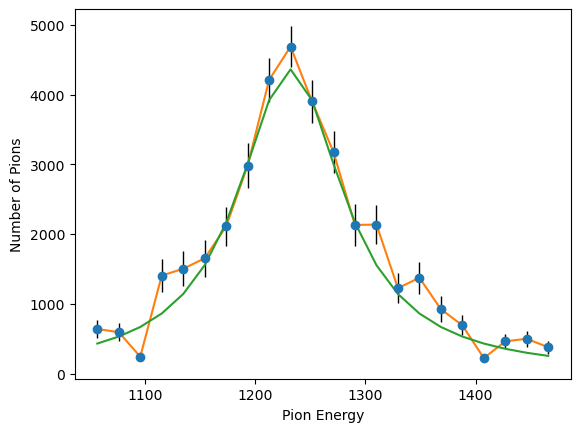

In [16]:
#assigning data to the correct axis
x = p_e
y = p_n

#plotting the curve based on observed data
plt.xlabel("Pion Energy")
plt.ylabel("Number of Pions")
plt.errorbar(x,y, yerr= p_err, linewidth=0, marker='o', ecolor='black', elinewidth=1)
plt.plot(x, y)

#plotting the theoretical curve over the experimental curve 
def theory(p_e,w):
    """
    Calculate the theoretical number of scattered pions for a range of energies

    Parameters:
    ----------------
    p_e: array
       energy of the incident pions (MeV)
    w: float
       resonance width (MeV)

    Returns:
    ----------------
    n_e: array
         theoretical number of incident pions corresponding to respective values of incident energy.
    """
    n_e = ((1.467*10**7)/(((w**2)/4)+((p_e-1232)**2)))
    return n_e
#value of w calculated using data from the middle of the data set
w = 116
t_e = theory(p_e, w)

plt.plot(x, t_e)
plt.show()

In [20]:
#creating a discrepancy function to see how well my theoretical curve fits 

def discrepancy (p_e, p_n, p_err, w):
    """
    Calculate the discrepancy between theoretical and experimental number of pions

    Parameters:
    ----------------
    p_e : array
          energies of observed pions (MeV)
    p_n : array
          experimental number of pions at a range of energy values
    p_err : array
            uncertainty in the experimental number of pions
    w : float
        resonance width (MeV)

    Returns:
    -----------------
    chi2 : float
           the discrepancy between our observed and theoretical data
    """
    n_e = ((1.467*10**7)/(((w**2)/4)+((p_e-1232)**2)))
    residuals = p_n - n_e

    chi2 = np.sum((residuals/p_err)**2)
    return chi2

chi2 = discrepancy(p_e, p_n, p_err, w)
print("Discrepancy:", chi2)

Discrepancy: 101.0208334806735


In [28]:
#using scipy curve fit to reduce the sum of squares of residuals
from scipy.optimize import curve_fit

#using my initial value of w to increase the stability of the fit and reduce the risk of converging at the wrong minimum
w = 116

#using the function to find the optimal value of w (popt) and its respective variance (pcov)
popt, pcov = curve_fit(theory, p_e, p_n, p0=[w], sigma=p_err, absolute_sigma=True)

#obtaining the most optimal value of w as a single float
w_opt = popt[0]

#using covariance matrix to extract the variance of paramter w and taking the square root to find standard deviation
w_err = np.sqrt(np.diag(pcov))[0]

#rounding answers to 2 decimal places
print(f"Best-fit w:{w_opt:.2f} MeV +/ {w_err:.2f} MeV")

Best-fit w:113.63 MeV +/ 2.24 MeV
